# Gradients

This notebook visualises the gradient of FuzzyWOfS with respect to an image.

In [5]:
%%bash
pip install cmocean
pip install -e ../../Tools

Obtaining file:///home/jovyan/dea-notebooks/Tools
  Running setup.py develop for dea-tools


You should consider upgrading via the '/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/env/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import datacube
import cmocean
import matplotlib.pyplot as plt
from dea_tools.waterbodies import get_waterbody

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
dc = datacube.Datacube()

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [3]:
# id_ = '62ded922-0b1d-402c-a1b6-ca54e34e49a1'
# id_ = 'd01b7fba-7565-4817-b93e-4fe6402cc5b4'

# Lake Argyle - glinty
southwest = -16.72828, 128.44254
northeast = -16.06033, 129.00558
time = '2018-10-07'
product = 's2a_ard_granule'

# Perth - not glinty
# southwest = -32.28365, 115.37430
# northeast = -31.91778, 115.94765
# time = '2018-05-12'
# product = 's2a_ard_granule'

# Glinty glint glint
# southwest = -17.50263, 119.20715
# northeast = -16.52300, 120.44861
# time = '2021-02-10'
# product = 's2b_nrt_granule'

# Lake Victoria - glinty
# southwest = -34.05380, 141.19629
# northeast = -33.92228, 141.36314
# time = '2021-01-21'
# product = 's2b_nrt_granule'
# time = '2016-12-18'
# product = 's2a_ard_granule'


# region_code = '095074'
# product = 'ga_ls8c_ard_3'
# time = '2014-01-03'


# region_code = '092082'
# product = 'ga_ls8c_ard_3'
# time = '2016-11-03'


# southwest = -27.81331, 137.49475
# northeast = -27.79687, 137.52235
# product = 's2b_nrt_granule'
# time = '2021-02-16'

# southwest = -30.10682, 149.58778
# northeast = -30.08755, 149.60074

# southwest = -30.11634, 149.18869
# northeast = -30.10840, 149.20485

# product = 's2b_ard_granule'
# time = '2020-11-23'
# product = 'ga_ls8c_ard_3'
# time = '2020-11-22'


ylim, xlim = zip(southwest, northeast)

resolution = (-10, 10) if 's2' in product else (-30, 30)

In [4]:
ds = dc.find_datasets(product=product, x=xlim, y=ylim, time=time)
# ds = dc.find_datasets(product=product, region_code=region_code, time=time)

In [5]:
# S2 + bounding box
if 's2' in product:
    ds = dc.load(product, x=xlim, y=ylim, time=time, output_crs=ds[0].crs, resolution=resolution,
                 measurements=['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1', 'nbart_swir_2', 'nbart_swir_3'], group_by='solar_day')
else:
    ds = dc.load(product, x=xlim, y=ylim, time=time, output_crs=ds[0].crs, resolution=resolution,
                 measurements=['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], group_by='solar_day')

# ds = dc.load(product, region_code=region_code, time=time, output_crs=ds[0].crs, resolution=resolution,
#              measurements=['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], group_by='solar_day')

## Run FuzzyWOfS

In [6]:
import sys
sys.path.insert(1, '../DEAWaterbodies/DEAWaterbodiesToolkit')
import fuzzy_wofs

In [7]:
# S2
if 's2' in product:
    arr = ds[['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1', 'nbart_swir_2', 'nbart_swir_3']].to_array(dim='band')
else:
    arr = ds[['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']].to_array(dim='band')

In [8]:
fuzzy_results = fuzzy_wofs.wofs.fuzzy_predict(arr.values, fuzzy_wofs.guess_noise(arr.values, p=0.01))

In [9]:
fuzzy_results_hardleaves = fuzzy_wofs.wofs.fuzzy_predict(arr.values, fuzzy_wofs.guess_noise(arr.values, p=0.01), hard_leaves=True)

In [10]:
hard_results = fuzzy_wofs.wofs.predict(arr.values)

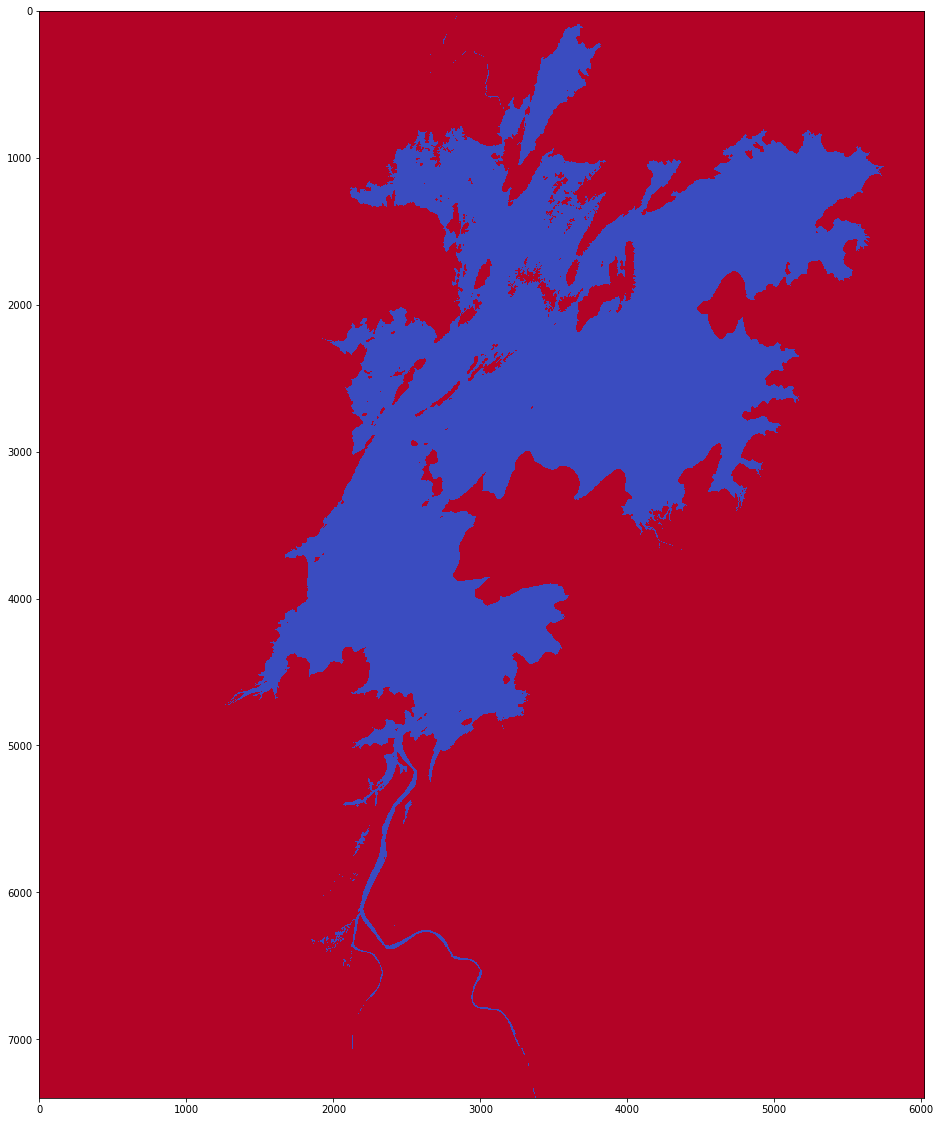

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(hard_results[0], cmap='coolwarm_r', vmin=0, vmax=1, interpolation='nearest')

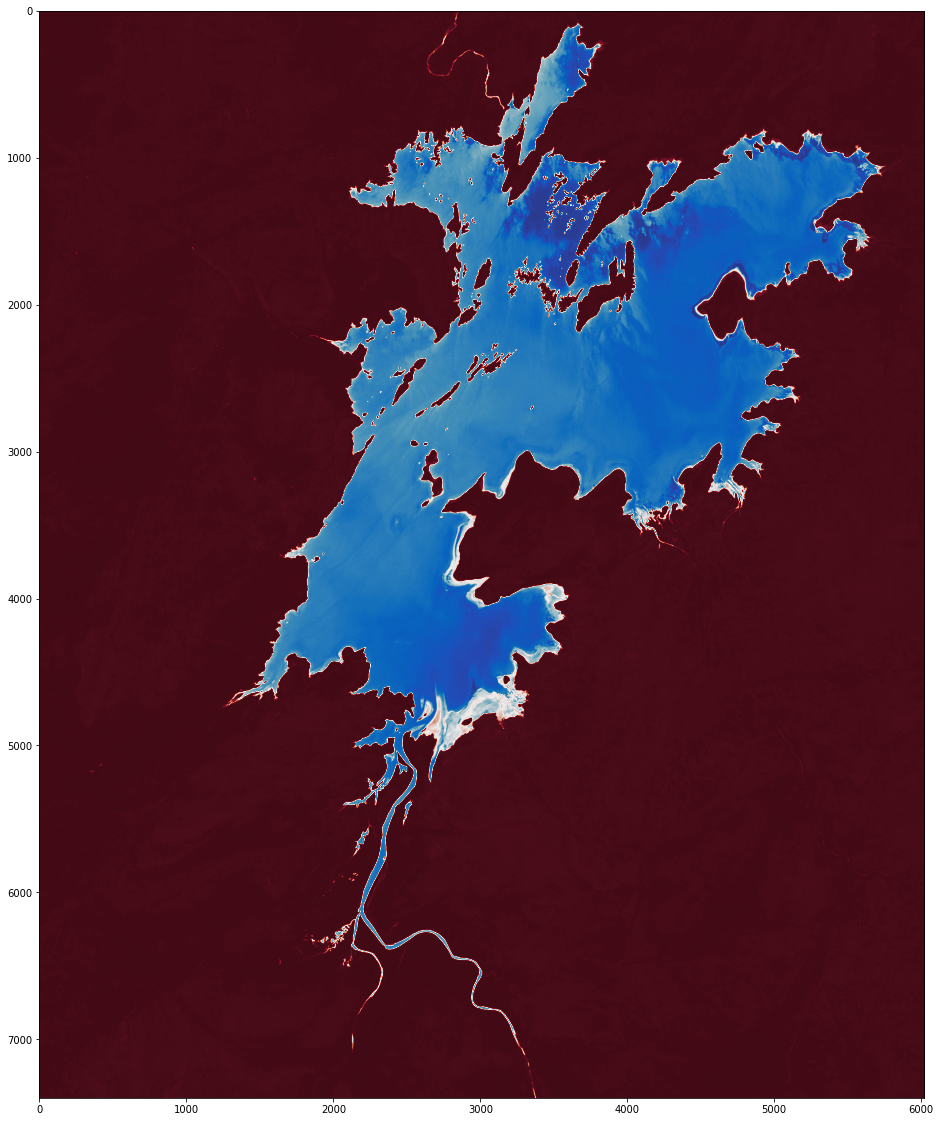

In [12]:
plt.figure(figsize=(20, 20))
plt.imshow(fuzzy_results_hardleaves[0], cmap='cmo.balance_r', vmin=0, vmax=1)

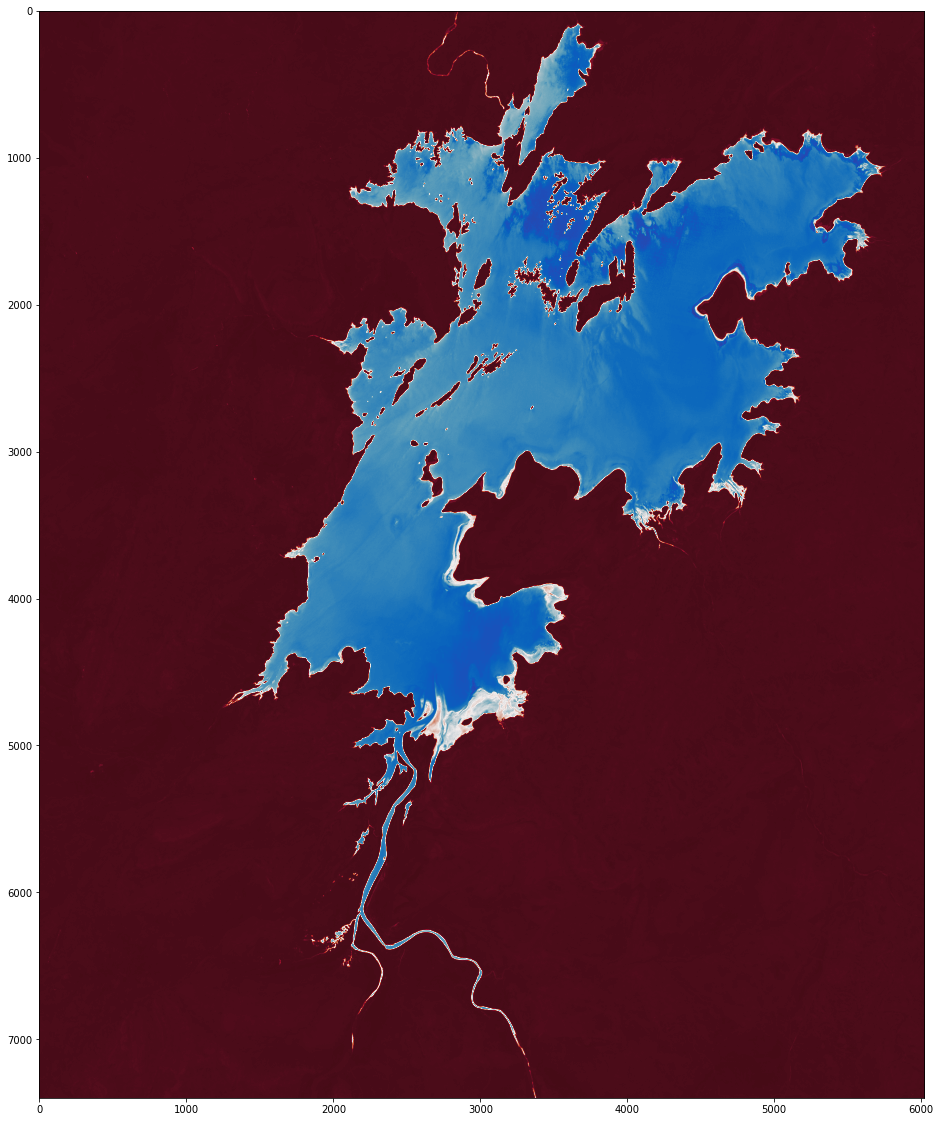

In [13]:
plt.figure(figsize=(20, 20))
plt.imshow(fuzzy_results[0], cmap='cmo.balance_r', vmin=0, vmax=1)

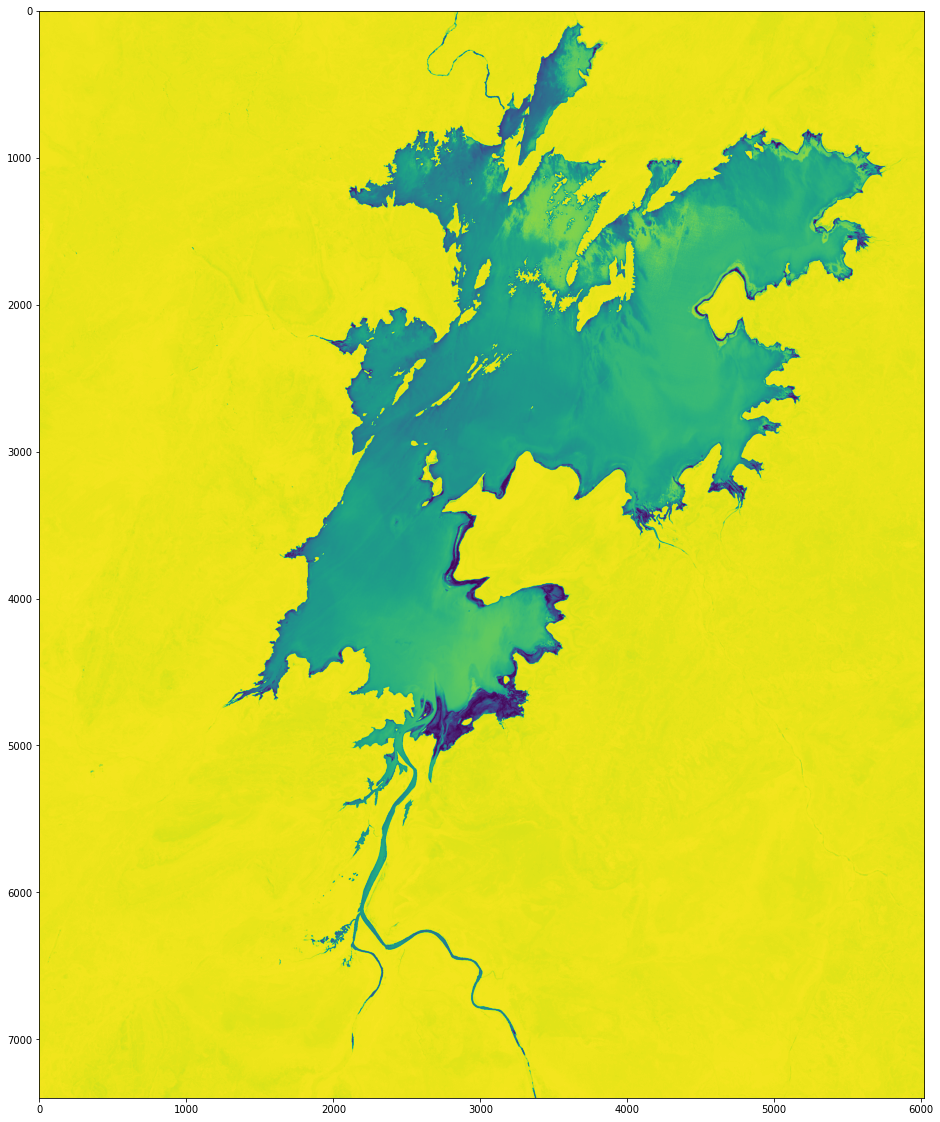

In [19]:
plt.figure(figsize=(20, 20))
plt.imshow(abs(0.5 - fuzzy_results_hardleaves[0]), cmap='viridis', vmin=0, vmax=0.5)
# plt.colorbar()

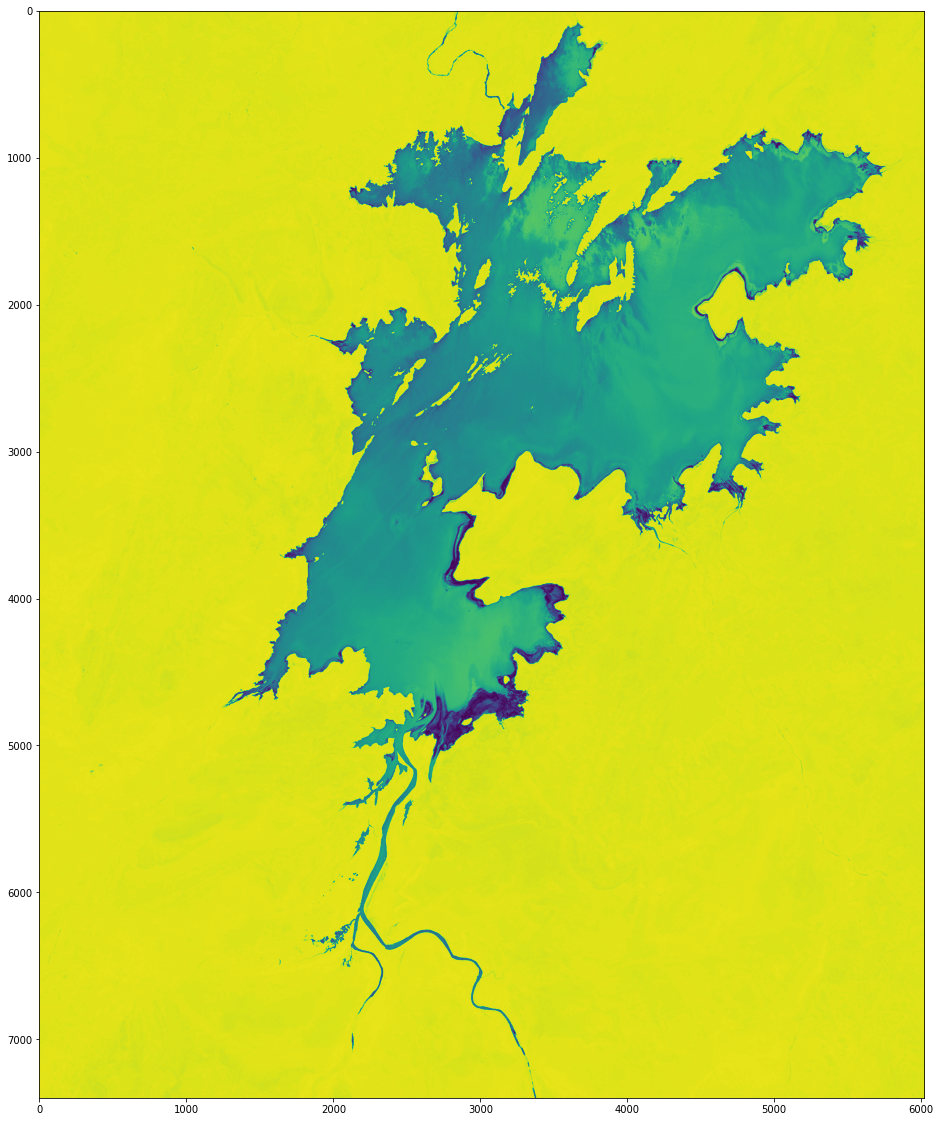

In [15]:
plt.figure(figsize=(20, 20))
plt.imshow(abs(0.5 - fuzzy_results[0]), cmap='viridis', vmin=0, vmax=0.5)
# plt.colorbar()

In [20]:
leaves = fuzzy_wofs.wofs.get_leaf(arr.values)

In [21]:
leaf_to_name = {}
tree_stack = [fuzzy_wofs.wofs]
while tree_stack:
    n = tree_stack.pop()
    if isinstance(n, fuzzy_wofs.FuzzyWOfSLeaf):
        leaf_to_name[n.id] = f'{n.id} | {n.wet_prob:.1%}'
        continue
    tree_stack.append(n.left_child)
    tree_stack.append(n.right_child)

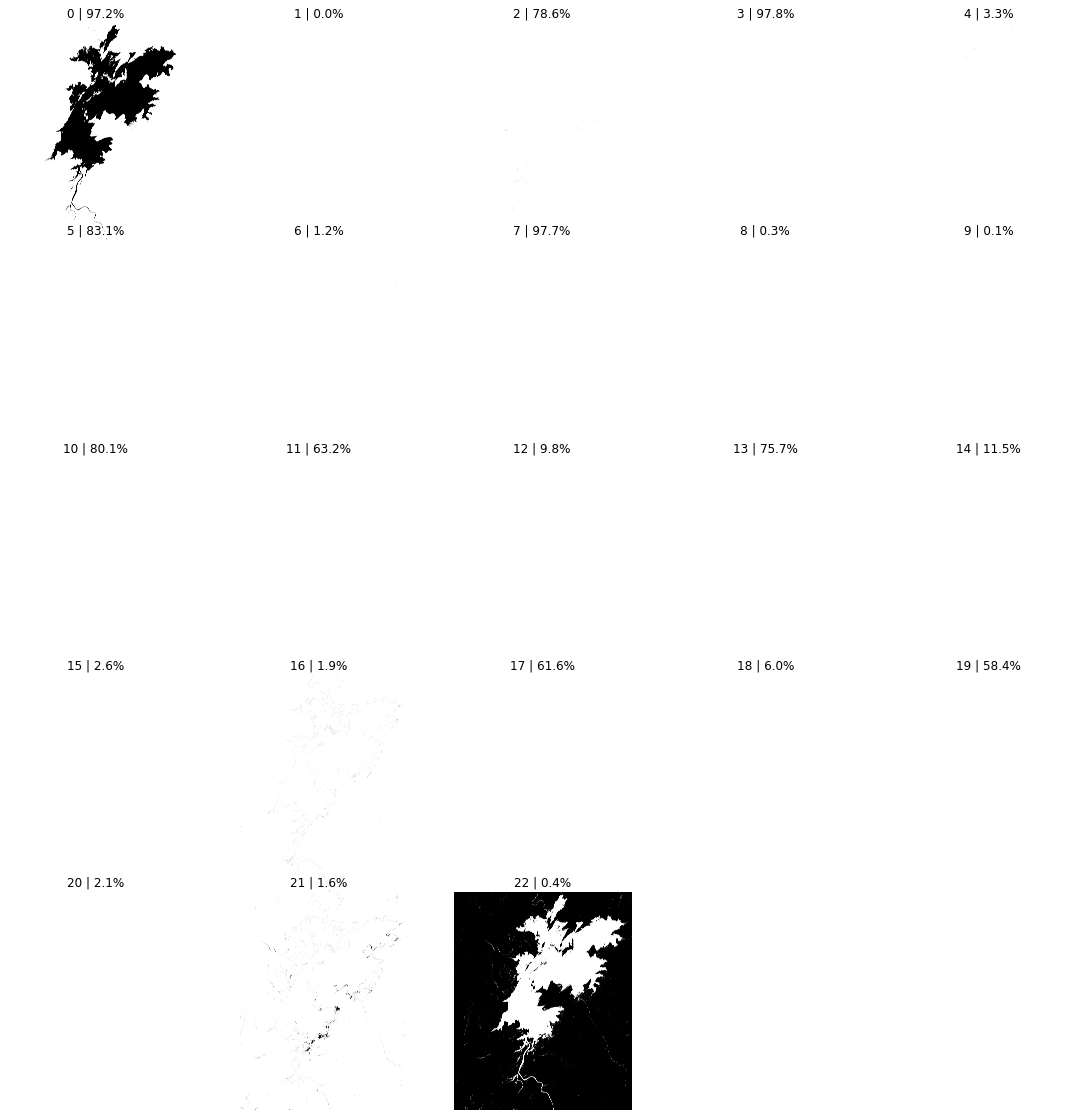

In [22]:
plt.figure(figsize=(20, 20))
for i in range(23):
    plt.subplot(5, 5, i + 1)
    plt.imshow(leaves[0] == i, cmap='Greys')
    plt.title(leaf_to_name[i])
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

## Calculate the gradients

Chuck everything into Tensorflow:

In [23]:
import tensorflow as tf

In [24]:
class FuzzyWOfSLeafTF(fuzzy_wofs.FuzzyWOfSLeaf):
    """A Tensorflow leaf node of the FuzzyWOfS classifier."""
    
class FuzzyWOfSNodeTF(fuzzy_wofs.FuzzyWOfSNode):
    """A Tensorflow internal node of the FuzzyWOfS classifier."""
    
    @staticmethod
    def band_ratio_sigma(a, b, a_sigma, b_sigma) -> float:
        """
        Calculates the uncertainty in normalised ratio index between bands a and b.
        """
        denominator = a + b
        denominator_sigma = tf.sqrt(a ** 2 + b ** 2)
        c = a / denominator
        c_sigma = tf.abs(c) * tf.sqrt((a / a_sigma) ** 2 + (denominator / denominator_sigma) ** 2)
        d = b / denominator
        d_sigma = tf.abs(d) * tf.sqrt((b / b_sigma) ** 2 + (denominator / denominator_sigma) ** 2)
        return tf.sqrt(c ** 2 + d ** 2)
    
    @classmethod
    def landsat_values(cls, px) -> [float]:
        """Convert Landsat pixel values into band ratios and pixel values.
        
        Parameters
        ----------
        px : (6, ...) array of floats
            Bands 1-5 and 7 of Landsat.
            
        Returns
        -------
        (9, ...) array of floats
            Bands 1-5 and 7 of Landsat, plus NDI 52, 43, and 72.
        """
        ndi_52 = cls.band_ratio(px[4], px[1])
        ndi_43 = cls.band_ratio(px[3], px[2])
        ndi_72 = cls.band_ratio(px[5], px[1])

        b1 = px[0]
        b2 = px[1]
        b3 = px[2]
        b4 = px[3]
        b5 = px[4]
        b7 = px[5]
        
        return tf.stack([b1, b2, b3, b4, b5, b7, ndi_52, ndi_43, ndi_72])
    
    @classmethod
    def landsat_values_sigma(cls, means, sigmas) -> [float]:
        """Convert Landsat pixel uncertainties into band ratio and pixel uncertainties.
        
        Parameters
        ----------
        means : (6, ...) array of floats
            Bands 1-5 and 7 of Landsat.
        sigmas : (6, ...) array of floats
            Uncertainty in bands 1-5 and 7 of Landsat.
            
        Returns
        -------
        (9, ...) array of floats
            Uncertainty of bands 1-5 and 7 of Landsat, plus NDI 52, 43, and 72.
        """
        ndi_52_sigma = cls.band_ratio_sigma(means[4], means[1], sigmas[4], sigmas[1])
        ndi_43_sigma = cls.band_ratio_sigma(means[3], means[2], sigmas[3], sigmas[2])
        ndi_72_sigma = cls.band_ratio_sigma(means[5], means[1], sigmas[5], sigmas[1])

        b1_sigma = tf.ones(means.shape[1:]) * sigmas[0]
        b2_sigma = tf.ones(means.shape[1:]) * sigmas[1]
        b3_sigma = tf.ones(means.shape[1:]) * sigmas[2]
        b4_sigma = tf.ones(means.shape[1:]) * sigmas[3]
        b5_sigma = tf.ones(means.shape[1:]) * sigmas[4]
        b7_sigma = tf.ones(means.shape[1:]) * sigmas[5]
        
        return tf.stack([b1_sigma, b2_sigma, b3_sigma, b4_sigma, b5_sigma,
                         b7_sigma, ndi_52_sigma, ndi_43_sigma, ndi_72_sigma])

    def __init__(self, split_feature, split_value, left_child, right_child):
        """Initialise the node.
        
        Parameters
        ----------
        split_feature : str
            Feature to split on; one of FuzzyWOfSNode.MEASUREMENT_NAMES.
            
        split_value : float
            Value of the feature to split on.
        
        left_child : FuzzyWOfSNode or FuzzyWOfSLeaf
            Node for split_feature <= split_value.
        
        right_child : FuzzyWOfSNode or FuzzyWOfSLeaf
            Node for split_feature > split_value.
        """
        self.left_child = left_child
        self.right_child = right_child
        self.split_feature = split_feature
        self.split_value = split_value
        self.split_index = self.MEASUREMENTS[self.split_feature]
        self.id = FuzzyWOfSNodeTF.NODE_ID
        FuzzyWOfSNodeTF.NODE_ID += 1
        self.colour = 'white'
    
    def _predict(self, values):
        """Predict whether a pixel is wet or dry (given band indices and pixels).
        
        Parameters
        ----------
        values : (9, ...) array of floats
            Array of band indices and pixel values.
        
        Returns
        -------
        bool
        """
        left = self.left_child._predict(values)
        right = self.right_child._predict(values)
        return tf.where(values[self.split_index] <= self.split_value,
                        left,
                        right)
    
    def _fuzzy_predict(self, means, stdevs, hard_edges=False, hard_leaves=False):
        """Predict the probability that a pixel is wet (given band indices and values).
        
        Parameters
        ----------
        means : (9, ...) array of floats
            Array of band indices and pixel values.
        
        stdevs : (9, ...) array of floats
            Array of uncertainties in band indices and pixel values.
        
        hard_edges : bool
            Whether the prediction should be hard rather than fuzzy.
            Default False.
        
        hard_leaves : bool
            Whether the leaves should be considered pure.
            Default False.
        
        Returns
        -------
        float
        """
        left = self.left_child._fuzzy_predict(means, stdevs, hard_edges=hard_edges, hard_leaves=hard_leaves)
        right = self.right_child._fuzzy_predict(means, stdevs, hard_edges=hard_edges, hard_leaves=hard_leaves)
        mean = means[self.split_index]
        stdev = stdevs[self.split_index]
        
        weight = tf.math.erf((mean - self.split_value) / stdev)
        weight = (weight + 1) / 2
        if hard_edges:
            weight = (mean - self.split_value) / stdev > 0

        return left * (1 - weight) + right * weight
    

def _get_wofs_tf():
    Leaf = FuzzyWOfSLeafTF
    Node = FuzzyWOfSNodeTF

    # Left subtree.
    left = Node('tm1', 2083.5,
               Node('tm7', 323.5,
                   Node('ndi43', 0.61,
                        Leaf(0.972, 44615),
                        Leaf(0.000, 173)),
                   Node('tm1', 1400.5,
                        Node('ndi72', -0.23,
                             Node('ndi43', 0.22,
                                  Leaf(0.786, 5264),
                                  Node('tm1', 473.0,
                                       Leaf(0.978, 360),
                                       Leaf(1 - 0.967, 869))),
                             Node('tm1', 379.0,
                                  Leaf(0.831, 160),
                                  Leaf(1 - 0.988, 1954))),
                       Node('ndi43', -0.01,
                            Leaf(0.977, 257),
                            Leaf(0.003, 2810)))),
               Leaf(0.001, 6683))

    # Right subtree.
    right = Node('ndi52', 0.23,
                 Node('tm1', 334.5,
                      Node('ndi43', 0.54,
                           Node('ndi52', 0.12,  # Typo in the paper here.
                                Leaf(0.801, 2467),
                                Node('tm3', 364.5,
                                     Node('tm1', 129.5,
                                          Leaf(0.632, 484),
                                          Leaf(1 - 0.902, 1727)),
                                     Node('tm1', 300.5,
                                          Leaf(0.757, 889),
                                          Leaf(1 - 0.885, 358)))),
                           Leaf(1 - 0.974, 4503)),
                      Leaf(1 - 0.981, 12441)),
                 Node('ndi52', 0.34,
                      Node('tm1', 249.5,
                           Node('ndi43', 0.45,
                                Node('tm3', 364.5,
                                     Node('tm1', 129.5,
                                          Leaf(0.616, 185),
                                          Leaf(1 - 0.940, 1072)),
                                     Leaf(0.584, 620)),
                                Leaf(1 - 0.979, 5703)),
                           Leaf(1 - 0.984, 10034)),
                      Leaf(1 - 0.996, 80246)))

    # All together:
    wofs_tree = Node('ndi52', -0.01, left, right)
    return wofs_tree

wofs = _get_wofs_tf()

In [25]:
import numpy as np
from tqdm.auto import tqdm

In [26]:
rows = []
for r in tqdm(range(0, arr.shape[2], 100)):
    mu_tm1 = tf.Variable(arr[0, 0, r:r + 100].astype('float32'))
    mu_tm2 = tf.Variable(arr[1, 0, r:r + 100].astype('float32'))
    mu_tm3 = tf.Variable(arr[2, 0, r:r + 100].astype('float32'))
    mu_tm4 = tf.Variable(arr[3, 0, r:r + 100].astype('float32'))
    mu_tm5 = tf.Variable(arr[4, 0, r:r + 100].astype('float32'))
    mu_tm7 = tf.Variable(arr[5, 0, r: r + 100].astype('float32'))

    sigma_tm1 = tf.Variable(1.0)
    sigma_tm2 = tf.Variable(1.0)
    sigma_tm3 = tf.Variable(1.0)
    sigma_tm4 = tf.Variable(1.0)
    sigma_tm5 = tf.Variable(1.0)
    sigma_tm7 = tf.Variable(1.0)
    
    means, sigmas = [mu_tm1, mu_tm2, mu_tm3, mu_tm4, mu_tm5, mu_tm7], [sigma_tm1, sigma_tm2, sigma_tm3, sigma_tm4, sigma_tm5, sigma_tm7]
    with tf.GradientTape() as tape:
        p = wofs.fuzzy_predict(means, sigmas, hard_leaves=False)
        grads = tape.gradient(p, [mu_tm1, mu_tm2, mu_tm3, mu_tm4, mu_tm5, mu_tm7])
    grad = tf.stack(grads).numpy().transpose(1, 2, 0)
    rows.append(grad)

  0%|          | 0/74 [00:00<?, ?it/s]

In [27]:
grad = np.concatenate(rows)

In [28]:
grad_ = np.nan_to_num(abs(grad[:, :, :3][:, :, ::-1]))
grad_ = np.clip(grad_, *np.percentile(grad_, [2, 98]))
grad_ -= grad_.min()
grad_ /= grad_.max()

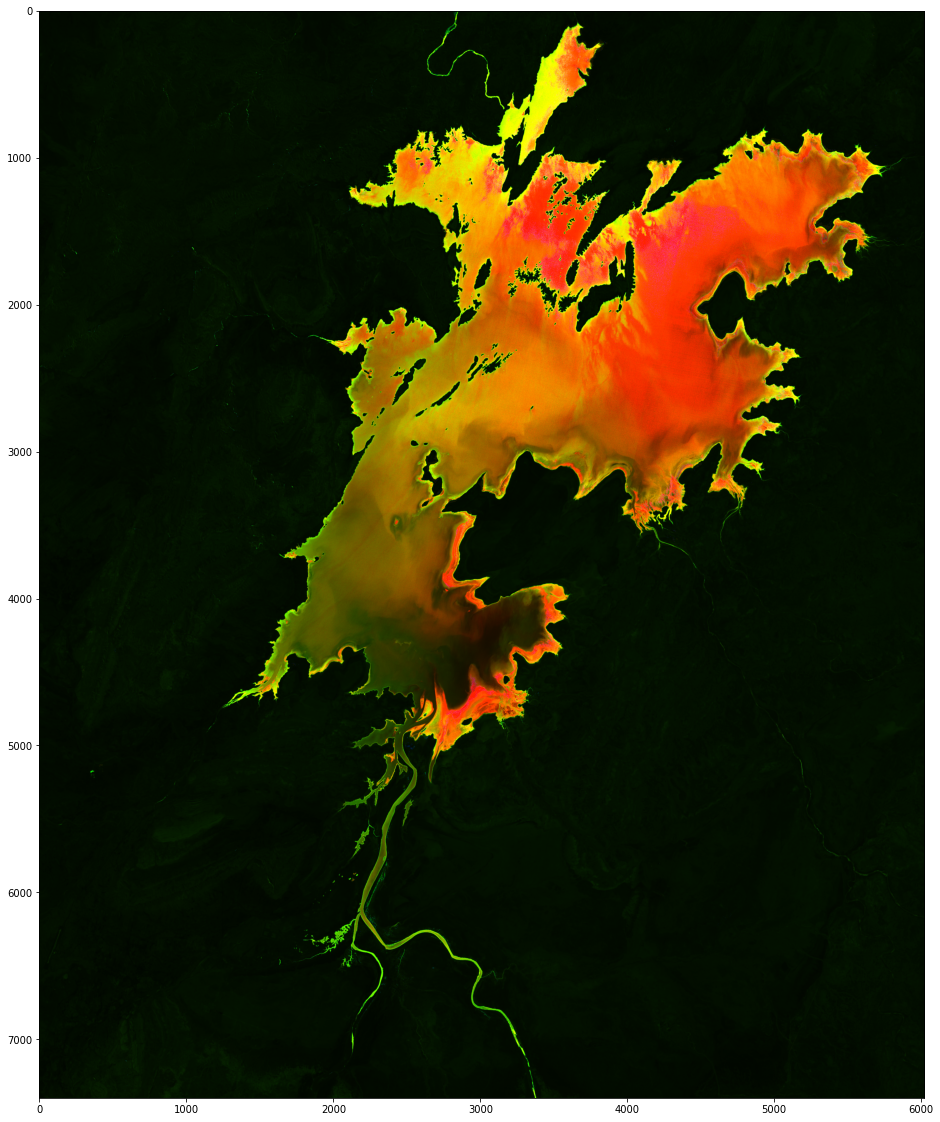

In [29]:
plt.figure(figsize=(20, 20))
plt.imshow(grad_)

In [30]:
grad_fc = np.nan_to_num(abs(grad[:, :, [4, 3, 1]]))
grad_fc = np.clip(grad_fc, *np.percentile(grad_fc, [2, 98]))
grad_fc -= grad_fc.min()
grad_fc /= grad_fc.max()

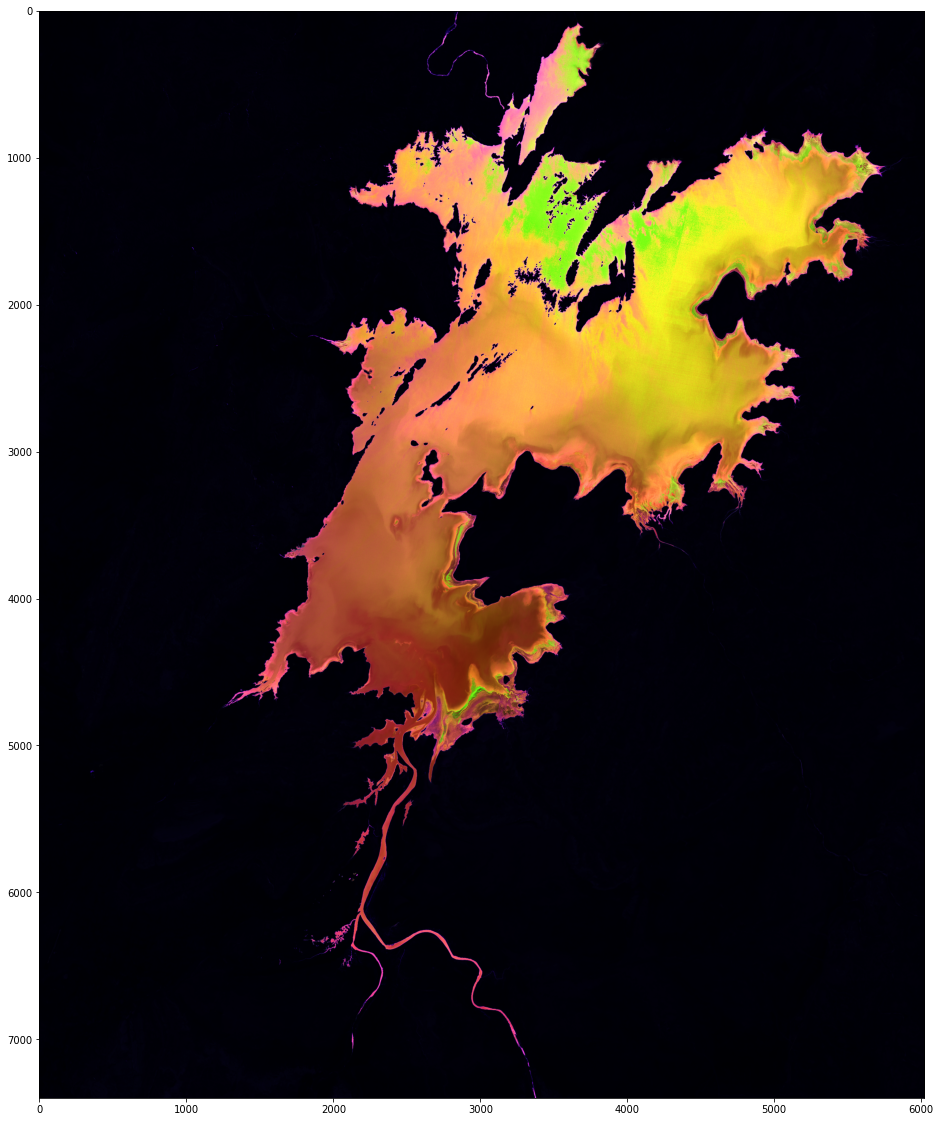

In [31]:
plt.figure(figsize=(20, 20))
plt.imshow(grad_fc)

In [33]:
grad_down = np.nan_to_num(grad[:, :, :3][:, :, ::-1])
grad_down = -np.clip(grad_down, np.percentile(grad_down, 2), 0)
grad_down -= grad_down.min()
grad_down /= grad_down.max()

/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


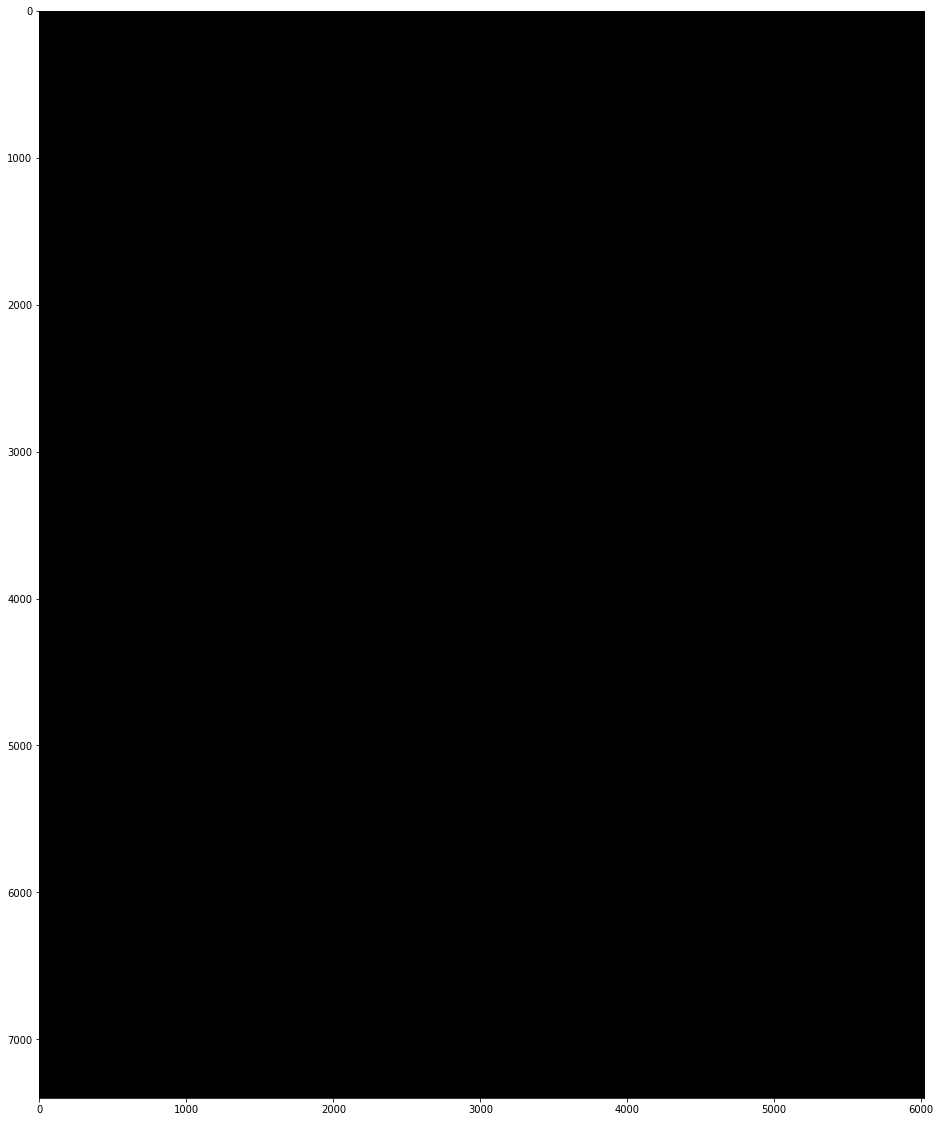

In [34]:
plt.figure(figsize=(20, 20))
plt.imshow(grad_down)